In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Chocolate.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
df.rename(columns={
    'Sales Person' : 'Sales_Person',
    'Boxes Shipped' : 'Boxes_Shipped'

},inplace = True)

In [4]:
df

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [5]:
df.isnull().sum()

,0
Sales_Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes_Shipped,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes_Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [8]:
df['Amount'] = df['Amount'].str.replace(',','.')

In [9]:
df['Amount'] = df['Amount'].str.replace('$','')

In [10]:
df['Amount'] = df['Amount'].astype(float)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-11-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales_Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes_Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True).dt.strftime('%-d-%-m-%Y')

اضافة الداله dayfirst = true , و وضع علامات - قبل كل حرف في الداله الاخدرى هو لحذف صفر من القيمه النهايه

In [14]:
df.head(6)

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,4-1-2022,5.320,180
1,Van Tuxwell,India,85% Dark Bars,1-8-2022,7.896,94
2,Gigi Bohling,India,Peanut Butter Cubes,7-7-2022,4.501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-4-2022,12.726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-2-2022,13.685,184
5,Van Tuxwell,India,Smooth Sliky Salty,6-6-2022,5.376,38


القيم السابقه كانت 04-01-2020

In [15]:
df['top_country'] = df.groupby('Country')['Amount'].transform('sum')
df

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped,top_country
0,Jehu Rudeforth,UK,Mint Chip Choco,4-1-2022,5.320,180,6807.031
1,Van Tuxwell,India,85% Dark Bars,1-8-2022,7.896,94,11066.769
2,Gigi Bohling,India,Peanut Butter Cubes,7-7-2022,4.501,91,11066.769
3,Jan Morforth,Australia,Peanut Butter Cubes,27-4-2022,12.726,342,14312.179
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-2-2022,13.685,184,6807.031
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-5-2022,4.410,323,14312.179
1090,Jehu Rudeforth,USA,White Choc,7-6-2022,6.559,119,13657.714
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-7-2022,574.000,217,9543.310
1092,Dotty Strutley,India,Eclairs,28-7-2022,2.086,384,11066.769


In [16]:
df['top_seles'] = df.groupby('Sales_Person')['Country'].transform('first')
df

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped,top_country,top_seles
0,Jehu Rudeforth,UK,Mint Chip Choco,4-1-2022,5.320,180,6807.031,UK
1,Van Tuxwell,India,85% Dark Bars,1-8-2022,7.896,94,11066.769,India
2,Gigi Bohling,India,Peanut Butter Cubes,7-7-2022,4.501,91,11066.769,India
3,Jan Morforth,Australia,Peanut Butter Cubes,27-4-2022,12.726,342,14312.179,Australia
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-2-2022,13.685,184,6807.031,UK
...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-5-2022,4.410,323,14312.179,New Zealand
1090,Jehu Rudeforth,USA,White Choc,7-6-2022,6.559,119,13657.714,UK
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-7-2022,574.000,217,9543.310,New Zealand
1092,Dotty Strutley,India,Eclairs,28-7-2022,2.086,384,11066.769,Australia


<Axes: xlabel='Country', ylabel='Amount'>

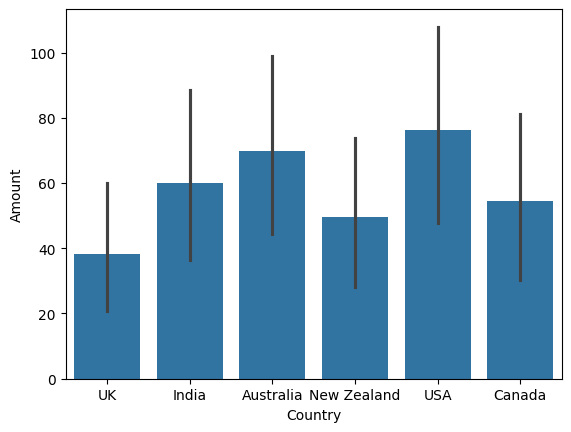

In [17]:
sns.barplot(x='Country',y='Amount',data=df)

<Axes: xlabel='top_country', ylabel='Amount'>

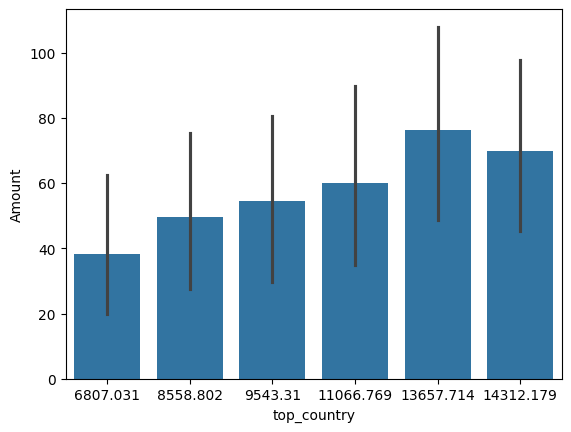

In [18]:
sns.barplot(x='top_country',y='Amount',data=df)

<Axes: xlabel='top_seles', ylabel='Amount'>

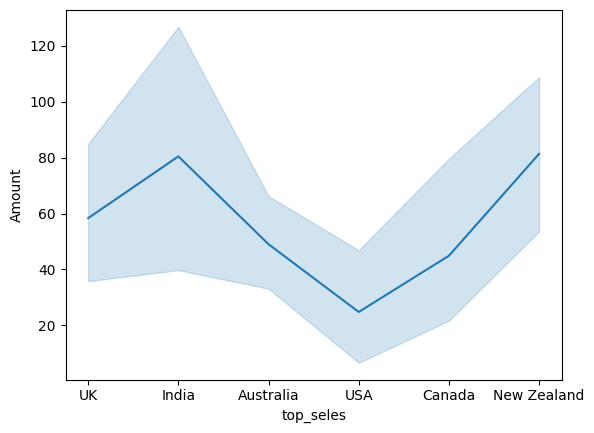

In [19]:
sns.lineplot(x='top_seles',y='Amount',data=df)

<Axes: xlabel='Country', ylabel='Amount'>

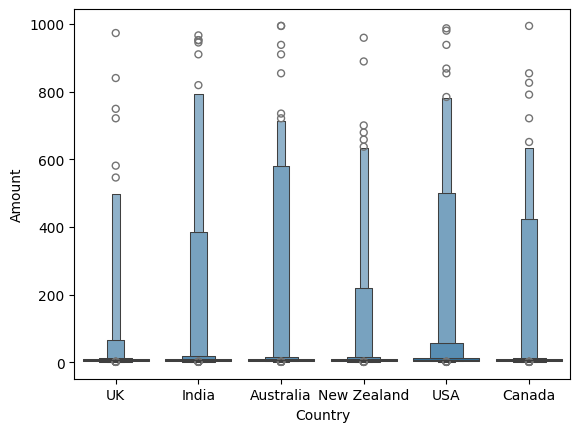

In [20]:
sns.boxenplot(x='Country',y='Amount',data=df)

<Axes: xlabel='Date'>

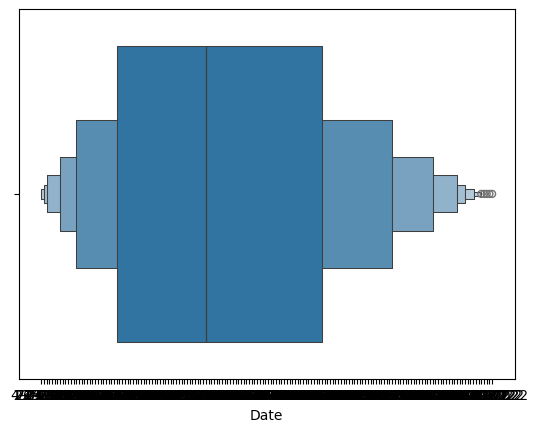

In [21]:
sns.boxenplot(x='Date',data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   float64
 5   Boxes_Shipped  1094 non-null   int64  
 6   top_country    1094 non-null   float64
 7   top_seles      1094 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 68.5+ KB


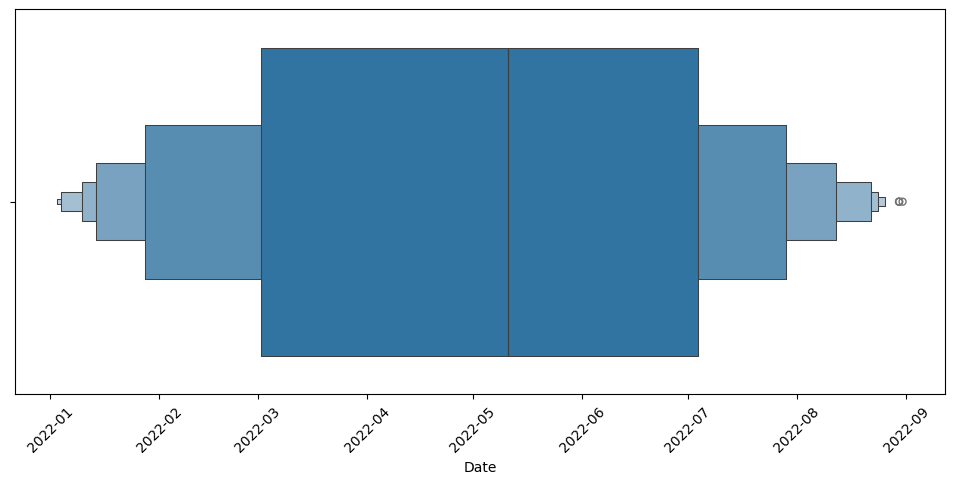

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y' , errors= 'coerce')

Q1 = df['Date'].quantile(0.25)
Q3 = df['Date'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Date'] >= lower_bound) & (df['Date'] <= upper_bound)]

plt.figure(figsize = (12,5))
sns.boxenplot(x='Date',data=df)
plt.xticks(rotation=45)
plt.show()

In [24]:
df[df['Date'] >= '2023'].count()

,0
Sales_Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes_Shipped,0
top_country,0
top_seles,0


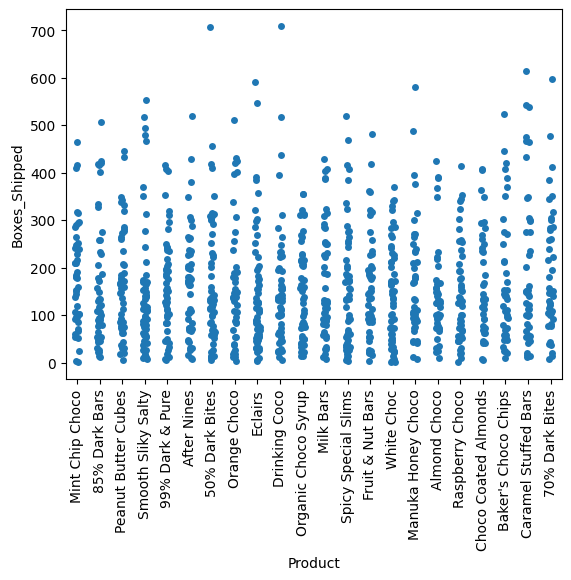

In [25]:
sns.stripplot(x='Product',y='Boxes_Shipped',data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
usapro = df[df['Country'] == 'USA']
usapro

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped,top_country,top_seles
11,Barr Faughny,USA,Orange Choco,2022-03-10,3.703,11,13657.714,USA
17,Roddy Speechley,USA,Smooth Sliky Salty,2022-04-05,3.017,140,13657.714,USA
21,Gunar Cockshoot,USA,Spicy Special Slims,2022-02-17,1.267,157,13657.714,Australia
22,Marney O'Breen,USA,After Nines,2022-05-30,4.753,163,13657.714,New Zealand
27,Husein Augar,USA,Eclairs,2022-07-07,4.025,112,13657.714,UK
...,...,...,...,...,...,...,...,...
1062,Dennison Crosswaite,USA,70% Dark Bites,2022-03-15,658.000,77,13657.714,New Zealand
1064,Gigi Bohling,USA,70% Dark Bites,2022-01-14,7.364,196,13657.714,India
1081,Dennison Crosswaite,USA,Smooth Sliky Salty,2022-05-12,11.781,91,13657.714,New Zealand
1082,Brien Boise,USA,Raspberry Choco,2022-01-12,672.000,194,13657.714,Australia


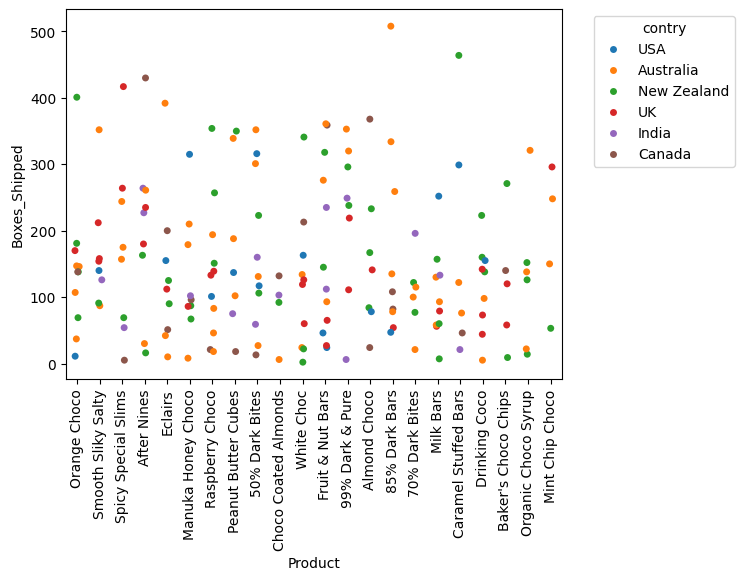

In [32]:
sns.stripplot(x='Product',y='Boxes_Shipped',data= usapro , hue='top_seles')
plt.xticks(rotation=90)
plt.legend(title = 'contry' , bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

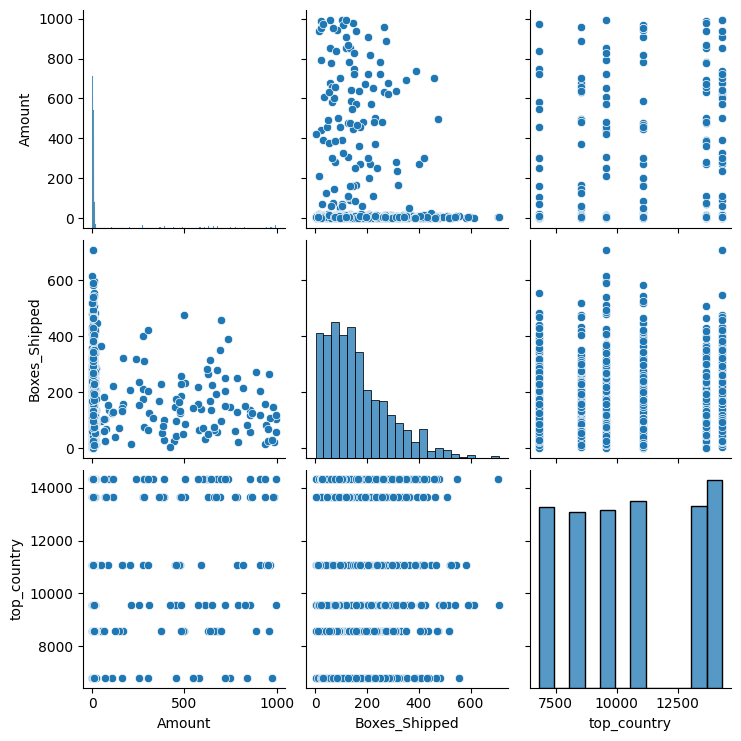

In [33]:
sns.pairplot(df)


Correlation Matrix:
                  Amount  Boxes_Shipped  top_country
Amount         1.000000      -0.030632     0.067582
Boxes_Shipped -0.030632       1.000000    -0.039993
top_country    0.067582      -0.039993     1.000000


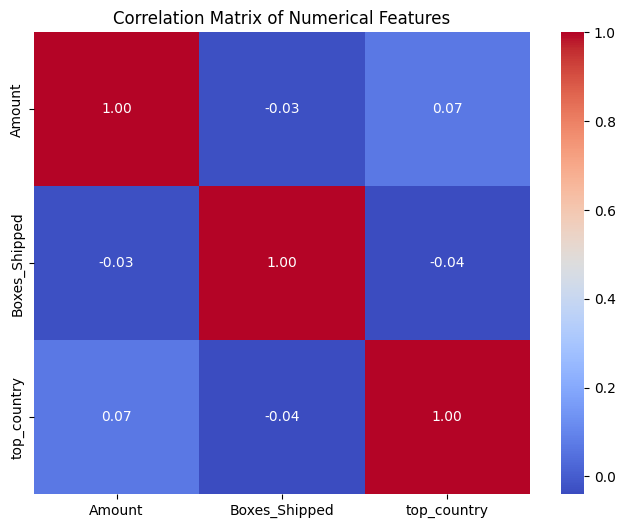

In [34]:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()